In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [39]:
df_1 = train.replace('--', 0).fillna(0).drop(['datetime', 'name', 'event', 'remarks'], axis=1)

In [40]:
le = LabelEncoder()
week = le.fit_transform(df_1.week)
weather = le.fit_transform(df_1.weather)
df_2 = df_1.drop(['week', 'weather'], axis=1)
week = pd.DataFrame(week, columns=['week'])
weather = pd.DataFrame(weather, columns=['weather'])
df_3 = pd.concat([df_2, week, weather], axis=1)
df_3.head()

,y,soldout,kcal,payday,precipitation,temperature,week,weather
0,90,0,0.0,0.0,0,19.8,0,0
1,101,1,0.0,0.0,0,17.0,3,0
2,118,0,0.0,0.0,0,15.5,2,0
3,120,1,0.0,0.0,0,15.2,1,0
4,130,1,0.0,0.0,0,16.1,4,0


In [41]:
X = df_3.drop(['y'], axis=1)
y = df_3.y

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [43]:
rfc = RandomForestClassifier(random_state=0, n_estimators=1000)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [44]:
rfc.feature_importances_

array([0.0631471 , 0.25544155, 0.02136281, 0.02937231, 0.33245892,
       0.16357008, 0.13464724])

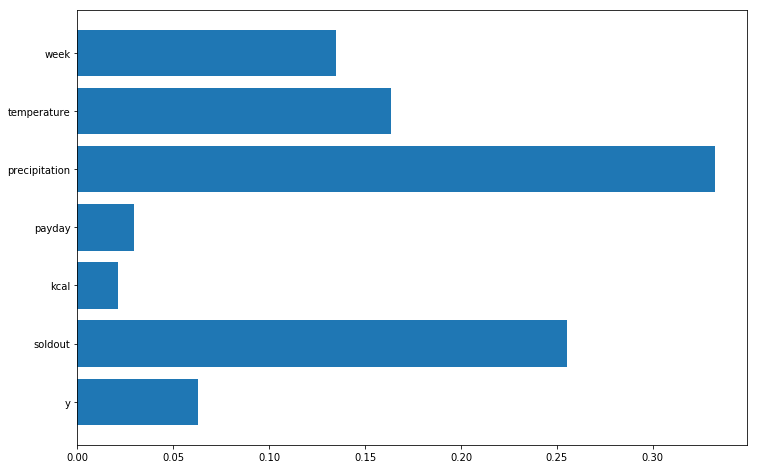

In [45]:
n_features = len(list(X))
plt.figure(figsize=(12, 8))
plt.barh(range(n_features), rfc.feature_importances_ , align='center')
plt.yticks(np.arange(n_features), list(df_3))
plt.show()

In [46]:
X_1 = df_3.loc[:, ['precipitation', 'soldout']]
X_1_train, X_1_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=0)

In [47]:
lr = LinearRegression()
lr.fit(X_1_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
print('train: %.3f' % (mse(y_train, lr.predict(X_1_train)) ** (1/2)))
print('test : %.3f' % (mse(y_test, lr.predict(X_1_test)) ** (1/2)))

train: 32.332
test : 33.525
